## 图像
### 基础

- [二值图像(`binary image`)]([https://zh.wikipedia.org/wiki/%E4%BA%8C%E5%80%BC%E5%9B%BE%E5%83%8F](https://zh.wikipedia.org/wiki/二值图像))：二值图是每个像素的可能性只要两个值的数字图像，如黑白。二值图通常在图像处理中作为图像掩码或图像分割、二值化中出现。二值图通常采用位图存储，一位代表一个像素。

- [灰度图像(`gray image`)]([https://zh.wikipedia.org/wiki/%E7%81%B0%E5%BA%A6%E5%9B%BE%E5%83%8F](https://zh.wikipedia.org/wiki/灰度图像))：灰度图像只包含一个通道的信息，其中每个像素可以表示最暗黑色和最亮白色之间的亮度信息。如果每个像素采用8位存储，就有256级灰度。

  ![灰度图](灰度图.png)

- 彩色图像：彩色图的每个像素点由颜色模型决定。

  ![彩色图](彩色图.png)

常见的彩色图有三种颜色模型：

- RGB颜色模型
- HSV色彩空间
- CIELab彩色空间

**RGB颜色模型**中每个像素由矢量`(R,G,B)`表示，每个像素由红(R)、绿(G)、蓝(B)三原色光按不同的比例符合后，让我们产生不同颜色的色觉。

8位图中，矢量的每个元素有8bit表示，表示范围为0~255，如全红色表示为(255,0,0)。RGB模型的基础是加色原理：

![加色原理](加色原理.png)



**HSV色彩空间**是RGB模型的笛卡尔坐标系表示，HSV即色相(H)、饱和度(S)、明度(V)：

- 色相：色彩基本属性，即颜色名称。
- 饱和度：色彩的纯度，越高色彩越纯，低则变暗。
- 明度：色彩的亮度。

![HSV模型](HSV模型.png)

**CIELab彩色空间**中，L表示亮度，a，b表示颜色对立维度。

![Lab颜色空间](Lab颜色空间.png)

### 参考
- [加色法]([https://zh.wikipedia.org/wiki/%E5%8A%A0%E8%89%B2%E6%B3%95](https://zh.wikipedia.org/wiki/加色法))
- [ 三原色光模式]([https://zh.wikipedia.org/wiki/%E4%B8%89%E5%8E%9F%E8%89%B2%E5%85%89%E6%A8%A1%E5%BC%8F](https://zh.wikipedia.org/wiki/三原色光模式))
- [HSV彩色空间]([https://zh.wikipedia.org/wiki/HSL%E5%92%8CHSV%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4](https://zh.wikipedia.org/wiki/HSL和HSV色彩空间))
- [CIELab彩色空间]([https://zh.wikipedia.org/wiki/Lab%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4](https://zh.wikipedia.org/wiki/Lab色彩空间))

## 例题

### 柿子图的彩色直方图和灰度直方图

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
img = cv2.imread("color_image.jpg")

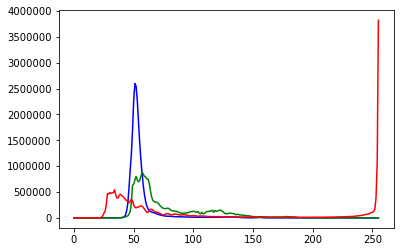

In [2]:
colors = ['blue', 'green', 'red']
for i in range(3):
    hist, x = np.histogram(img[:, :, i], bins=256, range=(0, 256))
    plt.plot(x[:-1], hist, label=colors[i], color=colors[i])
plt.show()

In [3]:
# 将BGR转换为灰度图,opencv采用的的是BGR格式
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
cv2.imwrite("gray_image.png",img_gray)

True

![gray_image](gray_image.png)

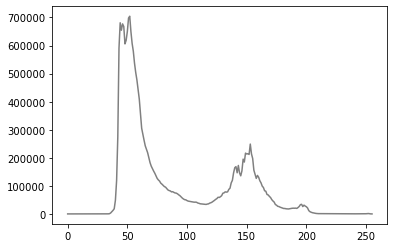

In [4]:
hist, x = np.histogram(img_gray, bins=256, range=(0, 256))
plt.plot(x[:-1] , hist, label='grey', color='grey')
plt.show()

### 将柿子图转换为HSV、CIELab彩色空间

In [5]:
import cv2
img = cv2.imread("color_image.jpg")
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imwrite("hsv_image.png",img_hsv)

True

![hsv mage](hsv_image.png)

In [6]:
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2Lab)
cv2.imwrite("lab_image.png",img_hsv)

True

![lab image](lab_image.png)

### 图像的二值化
图像的二值化是将每个像素点设置为0或255。其基本原理是：
$$
img[i][j] = \begin{cases}  
255,& img[i][j]>=threshold \\
0,& img[i][j]<threshold
\end{cases}
$$

`opencv`提供阈值函数`cv2.threshold`用于设置全局阈值，该函数有四个参数：
- `src`：灰度图。
- `thresh`：用于划分的阈值。
- `maxval`：像素值高于`thresh`时，设置为新的像素值。
- `type`：阈值方法。

`threshold`函数支持八种阈值方法：
- `THRESH_BINARY`
- `THRESH_BINARY_INV`
- `THRESH_MASK`
- `THRESH_OTSU`
- `THRESH_TOZERO`
- `THRESH_TOZERO_INV`
- `THRESH_TRIANGLE`
- `THRESH_TRUNC`

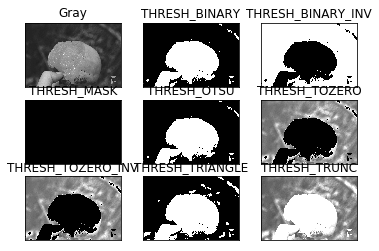

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("color_image.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thresh =100
ret,thresh1=cv2.threshold(gray,thresh,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(gray,thresh,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(gray,thresh,255,cv2.THRESH_MASK)
ret,thresh4=cv2.threshold(gray,thresh,255,cv2.THRESH_OTSU)
ret,thresh5=cv2.threshold(gray,thresh,255,cv2.THRESH_TOZERO)
ret,thresh6=cv2.threshold(gray,thresh,255,cv2.THRESH_TOZERO_INV)
ret,thresh7=cv2.threshold(gray,thresh,255,cv2.THRESH_TRIANGLE)
ret,thresh8=cv2.threshold(gray,thresh,255,cv2.THRESH_TRUNC)
titles=['Gray','THRESH_BINARY','THRESH_BINARY_INV','THRESH_MASK','THRESH_OTSU','THRESH_TOZERO',
         'THRESH_TOZERO_INV','THRESH_TRIANGLE','THRESH_TRUNC']
images =[gray,thresh1,thresh2,thresh3,thresh4,thresh6,thresh6,thresh7,thresh8]
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

自适应阈值：`cv2.adaptiveThreshold`
- `src`：灰度图。
- `maxValue`：大于阈值后，设置为`maxValue`。
- `adaptiveMethod`：自适应方法
    - `ADAPTIVE_THRESH_MEAN_C`：
    - `ADAPTIVE_THRESH_GAUSSIAN_C`：
- `thresholdType`：阈值类型。
    - `THRESH_BINARY`
    - `THRESH_BINARY_INV`
- `blockSize`：计算阈值的像素邻域大小。
- `C`：与自适应方法相关的参数。
    - `ADAPTIVE_THRESH_MEAN_C`：求均值，再减C。
    - `ADAPTIVE_THRESH_GAUSSIAN_C`：求加权和，再减C。

参考：
- https://blog.csdn.net/what_lei/article/details/49159655

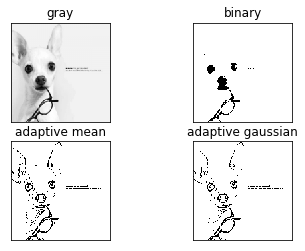

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("1_what_lei.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,th1= cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

# 自适应算法
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,5)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,5)

images =[gray,th1,th2,th3]
titles=['gray','binary','adaptive mean','adaptive gaussian']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

### 使用灰度阈值，把大于阈值的像素分为前景，小于阈值的像素分为背景

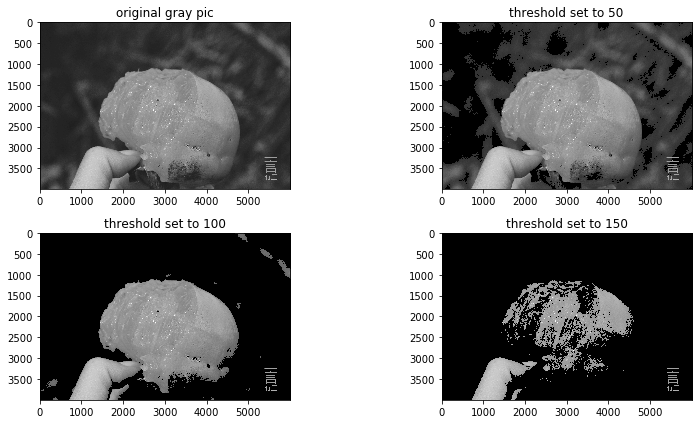

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("color_image.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.imshow(gray,cmap ='gray')
plt.title("original gray pic")

img50 = np.array(gray)
# 将小于50的像素点置为0
img50[img50<50]=0
plt.subplot(2,2,2)
plt.imshow(img50, cmap="gray")
plt.title("threshold set to 50")

img100 = np.array(gray)
# 将小于100的像素点置为0
img100[img100<100]=0
plt.subplot(2,2,3)
plt.imshow(img100, cmap="gray")
plt.title("threshold set to 100")

img150 = np.array(gray)
# 将小于150的像素点置为0
img150[img150<150]=0
plt.subplot(2,2,4)
plt.imshow(img150, cmap="gray")
plt.title("threshold set to 150")

plt.tight_layout()
plt.show()

[Otsu阈值法](https://zh.wikipedia.org/wiki/%E5%A4%A7%E6%B4%A5%E7%AE%97%E6%B3%95)

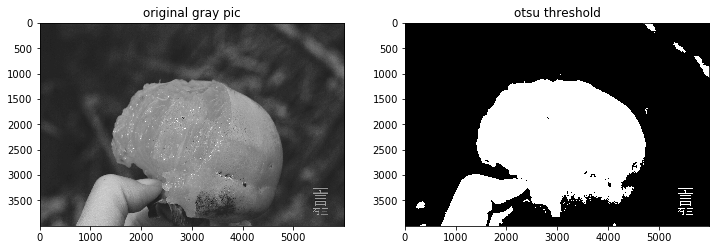

In [34]:
greyblur = cv2.GaussianBlur(gray,(5,5),0)
th,result = cv2.threshold(greyblur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(gray,cmap ='gray')
plt.title("original gray pic")

plt.subplot(1,2,2)
plt.imshow(result, cmap="gray")
plt.title("otsu threshold")
plt.show()

转换空间再通过ostu求阈值

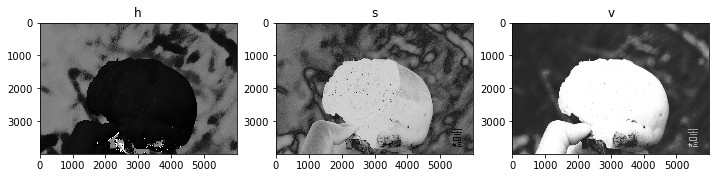

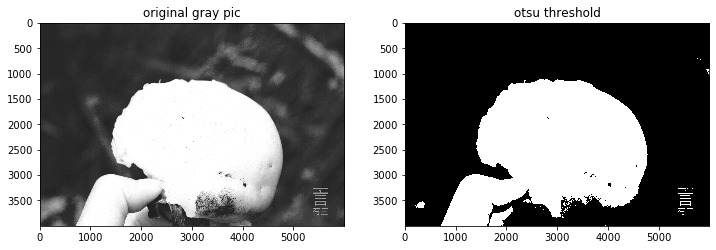

In [36]:
rgbimg=cv2.imread("color_image.jpg")
hsvimg = cv2.cvtColor(rgbimg,cv2.COLOR_BGR2HSV)
# 展现三个通道的图像
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(hsvimg[:,:,0],cmap ='gray')
plt.title("h")
plt.subplot(1,3,2)
plt.imshow(hsvimg[:,:,1],cmap ='gray')
plt.title("s")
plt.subplot(1,3,3)
plt.imshow(hsvimg[:,:,2],cmap ='gray')
plt.title("v")
plt.show()

grey = hsvimg[:,:,2]
greyblur = cv2.GaussianBlur(grey,(5,5),0)
th,result = cv2.threshold(greyblur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grey,cmap ='gray')
plt.title("original gray pic")
plt.subplot(1,2,2)
plt.imshow(result, cmap="gray")
plt.title("otsu threshold")
plt.show()